In [223]:
import numpy as np
import pandas as pd

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Master_Card Data


In [224]:
df = pd.read_excel('C:/Users/HP/Desktop/Prévision/temp.xlsx', index_col=0)

In [225]:
# Convert Month into Datetime
df['date']=pd.to_datetime(df['date'])

In [226]:
df

,date,TOTAL CHARGE
0,2018-10-07,61369.14
1,2018-10-08,7800.00
2,2018-10-14,35700.10
3,2018-10-21,38946.86
4,2018-10-28,84771.08
...,...,...
65,2019-10-06,98374.26
66,2019-10-13,75651.70
67,2019-10-20,75196.18
68,2019-10-27,142921.59


In [227]:
#Set date as index
df.set_index('date',inplace=True)

# Total des charges enregistrées par semaines

<AxesSubplot:xlabel='date'>

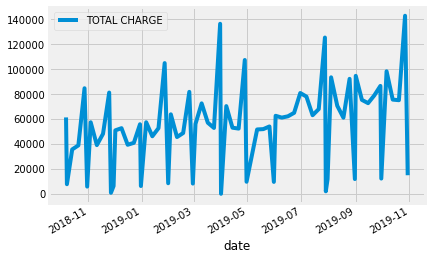

In [228]:
df.plot()

# Choix des paramètres d'entrées (p,d,q) du modèle SARIMA

In [229]:
import itertools 

p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 0, 1) x (0, 0, 2, 6)
SARIMAX: (0, 0, 2) x (0, 0, 3, 6)
SARIMAX: (0, 0, 2) x (0, 1, 0, 6)


In [ ]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 6)6 - AIC:1726.4667191813282
ARIMA(0, 0, 0)x(0, 0, 1, 6)6 - AIC:1560.2089640187648
ARIMA(0, 0, 0)x(0, 0, 2, 6)6 - AIC:1408.4125319740308
ARIMA(0, 0, 0)x(0, 0, 3, 6)6 - AIC:1703.0192727435228
ARIMA(0, 0, 0)x(0, 1, 0, 6)6 - AIC:1519.8365104724542
ARIMA(0, 0, 0)x(0, 1, 1, 6)6 - AIC:1362.3336738184105
ARIMA(0, 0, 0)x(0, 1, 2, 6)6 - AIC:1225.4857487903803
ARIMA(0, 0, 0)x(0, 1, 3, 6)6 - AIC:3798.5594063648327
ARIMA(0, 0, 0)x(0, 2, 0, 6)6 - AIC:1436.798330377462
ARIMA(0, 0, 0)x(0, 2, 1, 6)6 - AIC:1242.9588577891927
ARIMA(0, 0, 0)x(0, 2, 2, 6)6 - AIC:1094.299495779311
ARIMA(0, 0, 0)x(0, 2, 3, 6)6 - AIC:1705.6276078206242
ARIMA(0, 0, 0)x(0, 3, 0, 6)6 - AIC:1681.2546884812589
ARIMA(0, 0, 0)x(0, 3, 1, 6)6 - AIC:2594.427034020758
ARIMA(0, 0, 0)x(0, 3, 2, 6)6 - AIC:1139.301218444317
ARIMA(0, 0, 0)x(0, 3, 3, 6)6 - AIC:974.5684459081755
ARIMA(0, 0, 0)x(1, 0, 0, 6)6 - AIC:1540.753511217492
ARIMA(0, 0, 0)x(1, 0, 1, 6)6 - AIC:1507.0750276430756
ARIMA(0, 0, 0)x(1, 0, 2, 6)6 - AIC

In [177]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(3, 0, 2),   #302 121
                                seasonal_order=(1, 2, 1, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
#ARIMA(1, 1, 1)x(1, 1, 1, 6)6 - AIC:1318.9307211981547
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4945      0.356      4.199      0.000       0.797       2.192
ar.L2         -0.5559      0.632     -0.880      0.379      -1.794       0.682
ar.L3          0.0269      0.387      0.069      0.945      -0.732       0.786
ma.L1         -1.9405      0.123    -15.779      0.000      -2.182      -1.699
ma.L2          0.9565      0.115      8.291      0.000       0.730       1.183
ar.S.L6       -0.2872      0.486     -0.591      0.555      -1.240       0.666
ma.S.L6       -0.9672      0.233     -4.142      0.000      -1.425      -0.510
sigma2      3.321e+09   6.76e-11   4.92e+19      0.000    3.32e+09    3.32e+09


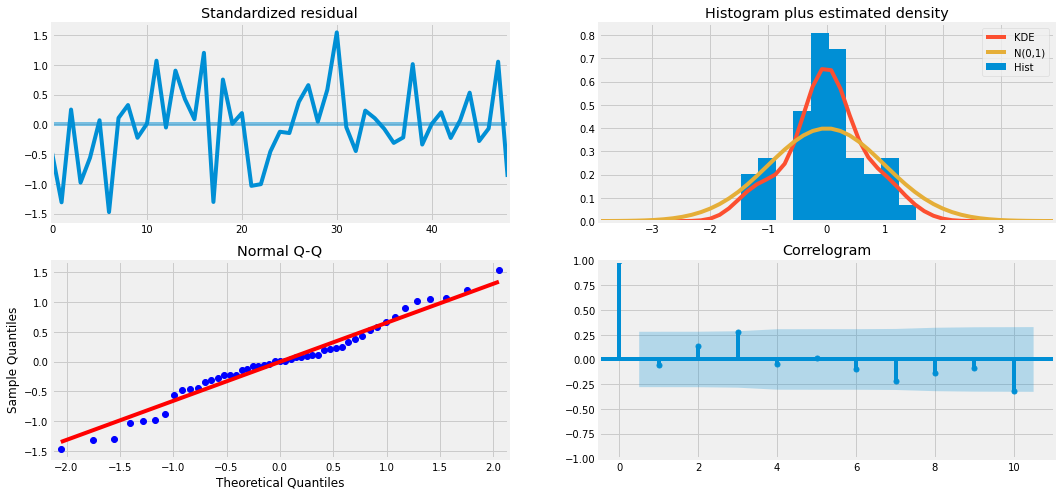

In [178]:

results.plot_diagnostics(figsize=(16, 8))
plt.show()

# Comparaison et test de la prévision sur les 4 derniers mois

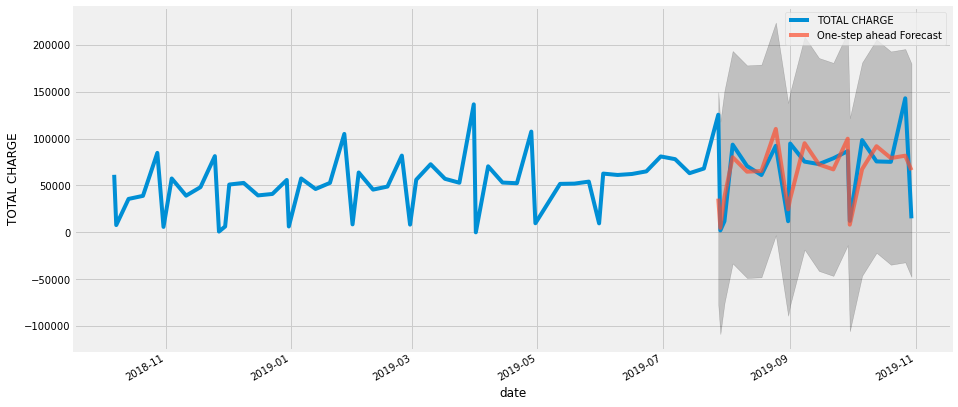

In [152]:
pred = results.get_prediction(start=pd.to_datetime('2019-07-28'), dynamic=False)
pred_ci = pred.conf_int()

ax = df['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('date')
ax.set_ylabel('TOTAL CHARGE')
plt.legend()

plt.show()

# Valeurs des métrics (RMSE,MAE) pour voir la précision du modèle

In [142]:
from sklearn.metrics import mean_absolute_error
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(data = y_forecasted).to_numpy()
y_truth = df['2019-07-28':].to_numpy()

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Compute the mean absolute error
mae = mean_absolute_error(y_truth, y_forecasted)

The Mean Squared Error of our forecasts is 1113669649.67


In [143]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
print('The Root Mean AbsoluteError of our forecasts is', mae)

The Root Mean Squared Error of our forecasts is 33371.69
The Root Mean AbsoluteError of our forecasts is 23365.62475279117


# Plot de notre série temporelle avec les prévisions des 3 prochains mois

Text(0, 0.5, 'TOTAL CHARGE')

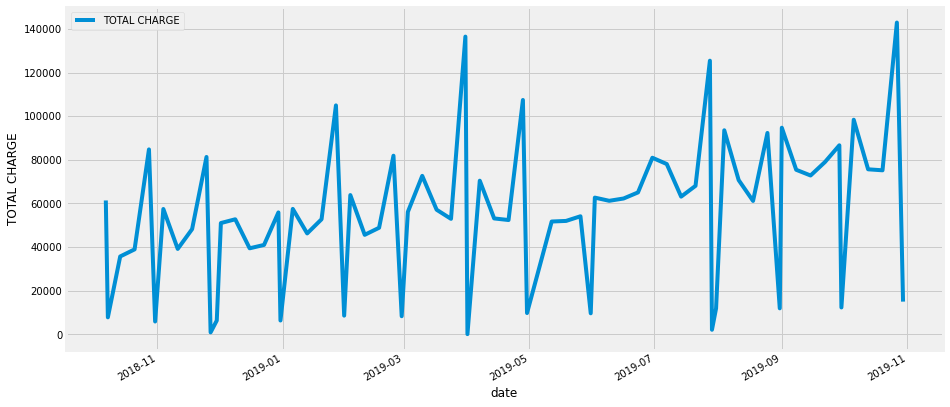

In [221]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(14, 7))
ax.set_xlabel('date')
ax.set_ylabel('TOTAL CHARGE')

Text(0, 0.5, 'TOTAL CHARGE')

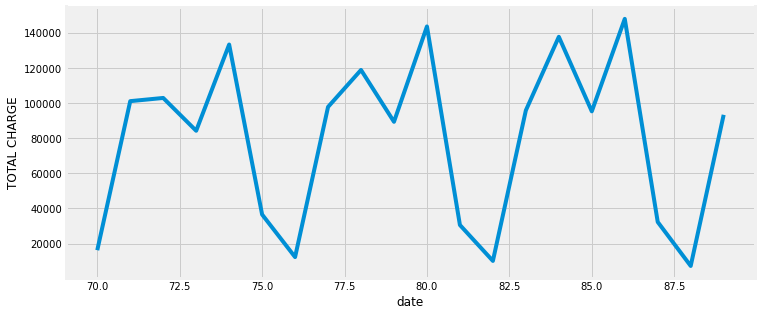

In [222]:

az = pred_uc.predicted_mean.plot(label='forecast', figsize=(11, 5))
az.set_xlabel('date')
az.set_ylabel('TOTAL CHARGE')